# Изучение закономерностей, определяющих успешность игр

****
**Данные для анализа**: исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы  интернет-магазина «Стримчик».

**Цель анализа**: интернет-магазин хочет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи**: выявить закономерности, определяющие успешность игр.

Содержание:
1. [Общая информация о наборе данных](#1)
2. [Подготовка данных](#2)
    1. [Обработка наименований столбцов](#2.1)
    2. [Изменение типов данных](#2.2)
    3. [Обработка пропусков](#2.3)
    4. [Подсчёт суммарных продаж во всех регионах](#2.4)
    5. [Промежуточные выводы](#2.5)
3. [Исследовательский анализ данных](#3)
    1. [Выпуск игр по годам](#3.1)
    2. [Продажи игр по платформам](#3.2)
    3. [Выбор данных за актуальный период](#3.3)
    4. [Анализ лидирующих за актуальный период платформ](#3.4)
    5. [Построение и анализ графика «ящик с усами» по глобальным продажам игр в разбивке по платформам](#3.5)
    6. [Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков](#3.6)
    7. [Соотнесение выводов с продажами игр на других платформах](#3.7)
    8. [Распределение игр по жанрам](#3.8)
    9. [Промежуточные выводы](#3.9)
4. [Составление портрета пользователя каждого региона](#4)
    1. [Пользователи из Северной Америки](#4.1)
    2. [Пользователи из Европы](#4.2)
    3. [Пользователи из Японии](#4.3)
    4. [Промежуточные выводы](#4.4)
5. [Проверка гипотез](#5)
    1. [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?](#5.1)
    2. [Средние пользовательские рейтинги жанров Action и Sports разные?](#5.2)
    3. [Промежуточные выводы](#5.3)
6. [Общий вывод](#6)
****

## Общая информация о наборе данных <a id='1'></a>

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn
pd.set_option('display.max_columns', None)

In [2]:
# Записываем датасет в переменную data

data = pd.read_csv('datasets/games.csv')

In [3]:
# выводим верхние строки датасета

data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# выводим общую информацию о наборе данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


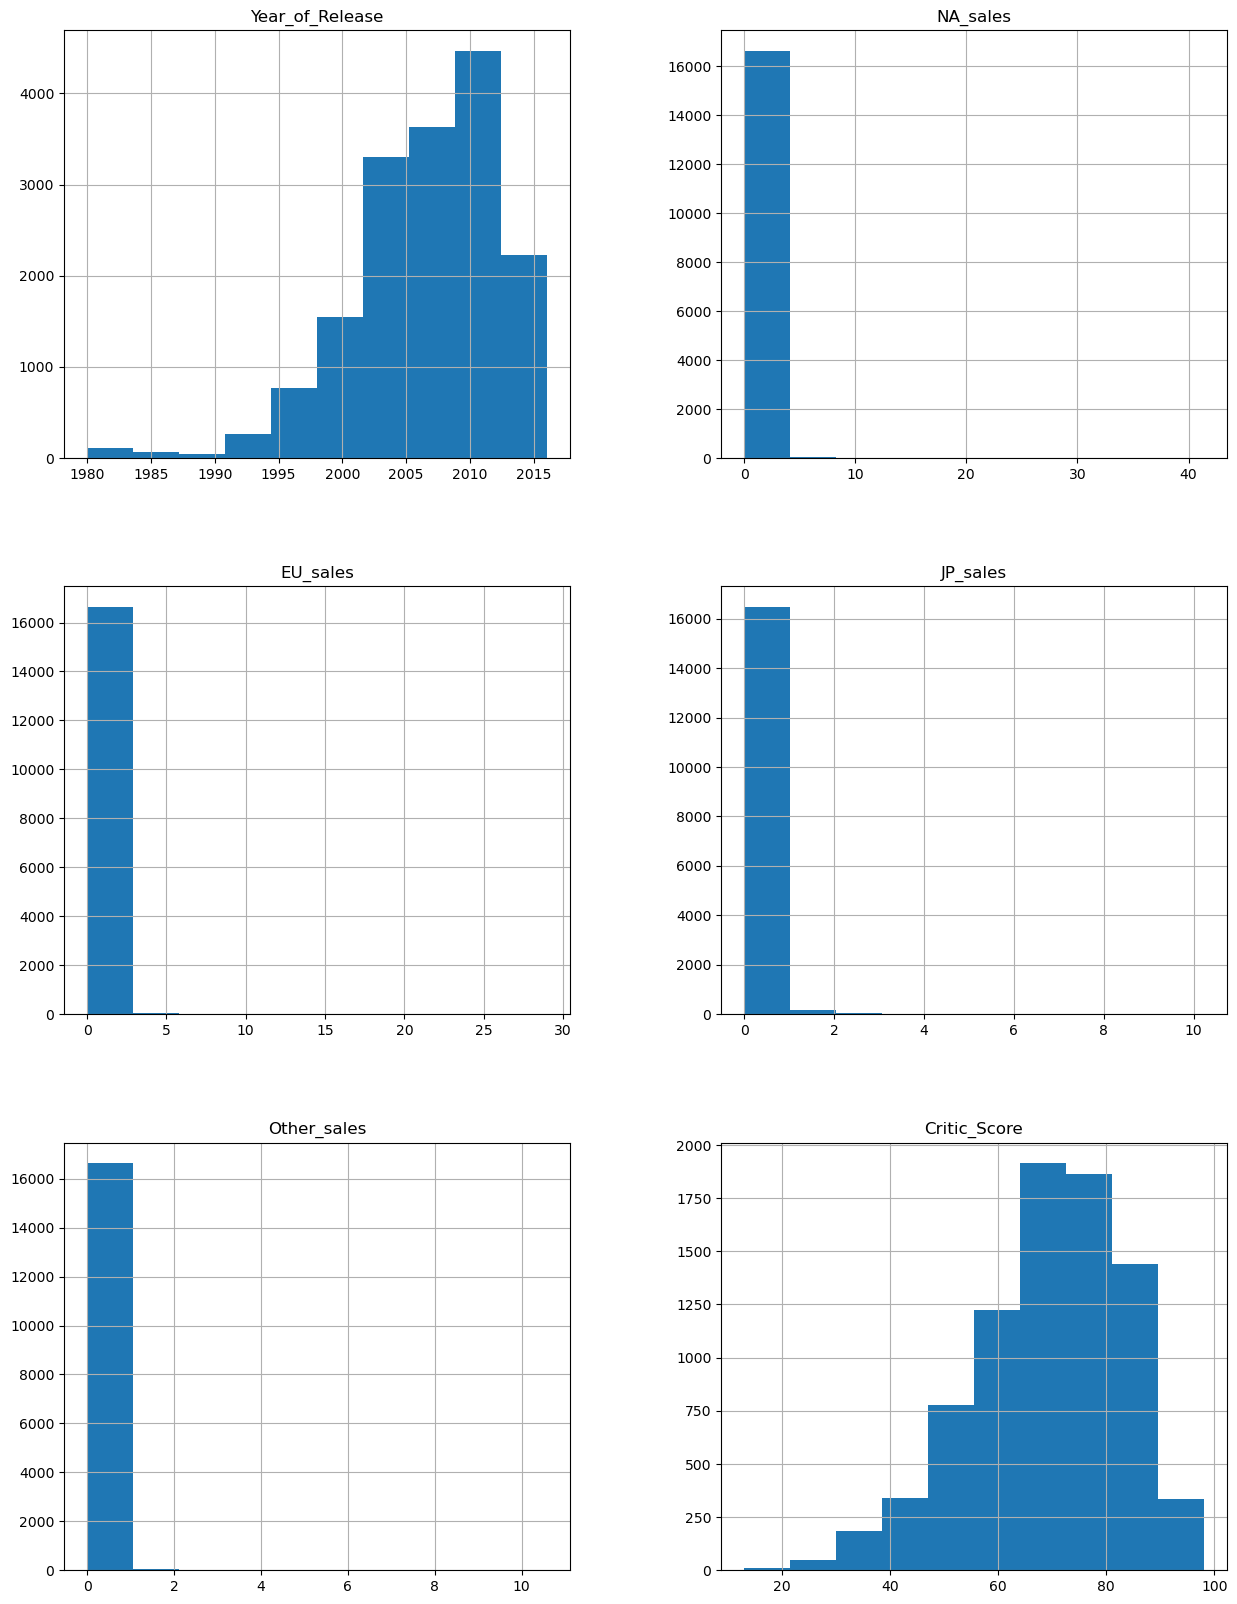

In [5]:
# Строим гистограммы по каждому столбцу

data.hist(figsize=(15, 20), bins=10);

****
### Промежуточные выводы по первому этапу

- Датасет содержит 11 столбцов и 16715 строк.

- Пропусков нет совсем только в столбцах: Platform, NA_sales, EU_sales, JP_sales, Other_sales. В остальных пропуски есть.

- В столбцах Name и Genre всего по 2 пропуска. Возможно, это одни и те же строки, и, возможно, их можно будет удалить целиком как бесполезные для анализа, это выяснится на следующем этапе.

- Тип данных в столбцах Year_of_Release, User_Score не соответствуют содержимому, их следует изменить.

- Количество игр стало увеличиваться после 1991 года, резкий скачок - в начале 2000х.

- Распределение значений в столбцах на первый взгляд (и в таком небольшом масштабе гистограмм) не выглядит необычно.

- Необходимо детальнее рассмотреть распределение и диапазоны значений на следующем этапе работы с данными.

- Названия столбцов нуждаются в корректировке в соответствии с "правилами хорошего кода".

****

## Подготовка данных <a id='2'></a>

### Обработка наименований столбцов <a id='2.1'></a>

In [6]:
# Переименуем столбцы для удобства и в соответствии с правилами хорошего кода

data = data.rename(columns={'Name': 'name',
                            'Platform':'platform',
                            'Year_of_Release':'year',
                            'Genre':'genre',
                            'NA_sales':'na_sales',
                            'EU_sales':'eu_sales',
                            'JP_sales':'jp_sales',
                            'Other_sales':'other_sales',
                            'Critic_Score':'critic_score',
                            'User_Score':'user_score',
                            'Rating':'rating'
                           })

### Изменение типов данных <a id='2.2'></a>

In [7]:
# В столбце user_score есть строки со значением 'tbd', обычно эта аббревиатура означает "to be determined",
# то есть, рейтинг /ещё/ не определен. Полагаем, что уместно заменить эти значения на пропуски, смысл сохранится.

data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [8]:
# Меняем тип данных в столбце user_score на дробный

data['user_score'] = data['user_score'].astype(float)

### Обработка пропусков <a id='2.3'></a>

In [9]:
# Выводим перечень столбцов с пропущенными значениями

data.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

#### Обработка пропусков в столбцах name и genre

In [10]:
# Проверим предположение о том, что пропуски в столбцах name и genre содержатся в одних и тех же строках

data.loc[data['name'].isna() & data['genre'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


***
Пропуски в столбцах name и genre содержатся в одних и тех же строках, кроме того, в этих же строках есть пропуски и в других важных для анализа столбцах. Эти строки можно удалить совсем, поскольку с такими пропусками они бесполезны, и их всего 2.
***

In [11]:
# удаляем строки из датасета
data = data.query('(~name.isna()) & (~genre.isna())')

# сбрасываем сбившиеся индексы
data = data.reset_index(drop=True)

#### Обработка пропусков в столбце year

***
В столбце year есть пропуски, однако таких строк меньше 2% от всего датасета. Поскольку год выхода игры важен для последующего анализа, а восстановить все пропуски в этом столбце не представляется возможным, удаляем строки, в которых нет информации о годе выхода игры.
***

In [12]:
# удаляем строки из датасета
data = data.query('~year.isna()')

# сбрасываем сбившиеся индексы
data = data.reset_index(drop=True)

In [13]:
# Меняем тип данных в столбце year на целочисленный

data['year'] = data['year'].astype(int)

#### Обработка пропусков в столбце rating

***
В столбце rating есть пропуски. Заполнить их значениями рейтинга невозможно, таких данных в нашем распоряжении нет. Для того, чтобы отразить пропуски в этом столбце в дальнейшем анализе, заполним их условным обозначением того, что рейтинг неизвестен либо отсутствует.
***

In [14]:
# Заполняем пропуски в стоолбце с рейтингом условным значением

data = data.fillna({'rating':'N/A'})

### Подсчёт суммарных продаж во всех регионах <a id='2.4'></a>

In [15]:
# Создаем новый столбец total_sales, в который суммируем продажи во всех регионах

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int32  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    7463 non-null   float64
 10  rating        16444 non-null  object 
 11  total_sales   16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


****
### Промежуточные выводы по второму этапу <a id='2.5'></a>

- В результате очистки в датасете осталось 16444 строки.

- Пропуски остались только в столбцах с рейтингом критиков и пользователей (количественные переменные), и в столбце с возрастным рейтингом (категориальные переменные). Для заполнения этих пропусков в нашем распоряжении нет достаточной информации, и заполнение их синтетическими значениями(средними/медианными) может существенно исказить общую картину при последующем анализе. Поэтому набор данных остается "как есть".

****

## Исследовательский анализ данных <a id='3'></a>

### Выпуск игр по годам <a id='3.1'></a>

year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

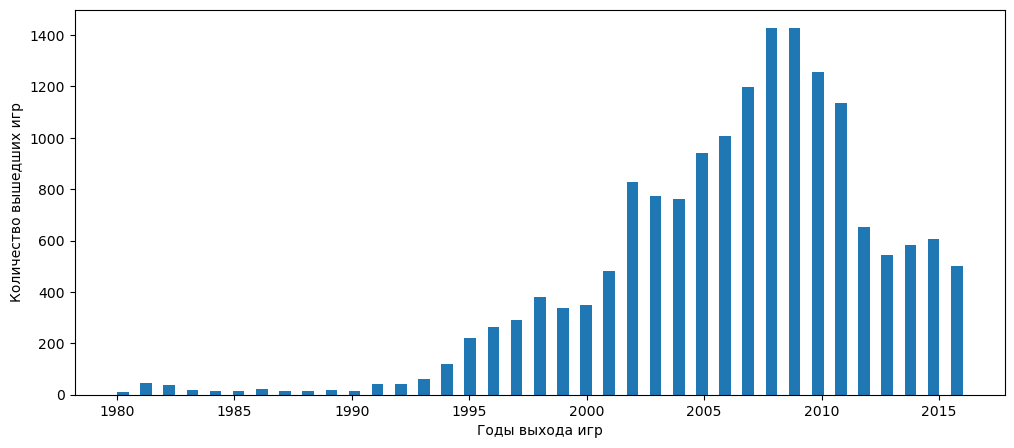

In [17]:
# Анализируем данные в столбце year

data['year'].plot(kind='hist', bins=73, figsize=(12, 5))
plt.xlabel("Годы выхода игр")
plt.ylabel("Количество вышедших игр")
plt.ticklabel_format(style='plain')

data.groupby('year')['name'].count()

***
После 2011 года количество выпущенных игр, представленных в датасете, сократилось практически вдвое. Причина такого сокращения на первый взгляд неясна, однако тенденция очевидна: **с 2012 года по 2016 год** выпускалось в среднем 570 игр ежегодно. Можно предположить, что для прогноза на 2017 год имеет смысл взять игры именно за этот период.
***

### Продажи игр по платформам <a id='3.2'></a>

In [18]:
# Изучим сумму продаж по платформам

data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(15)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
Name: total_sales, dtype: float64

***
Построим графики распределения продаж по годам по самым кассовым игровым платформам
***

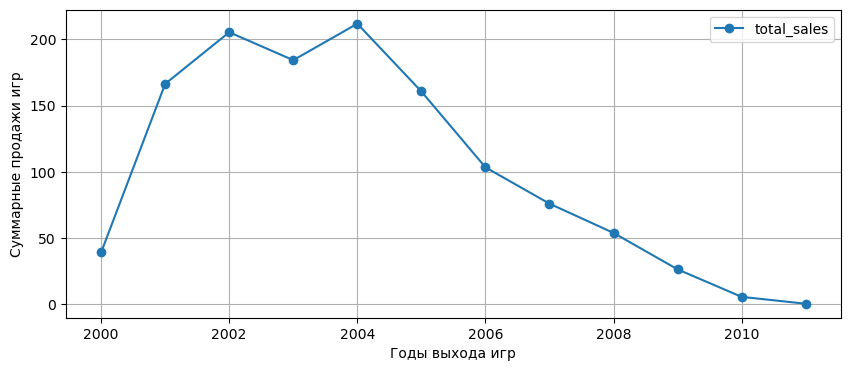

In [19]:
# Платформа PS2

data[data['platform'] == 'PS2'].pivot_table(index='year', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 4), style='o-');
plt.ticklabel_format(style='plain');
plt.xlabel("Годы выхода игр");
plt.ylabel("Суммарные продажи игр");

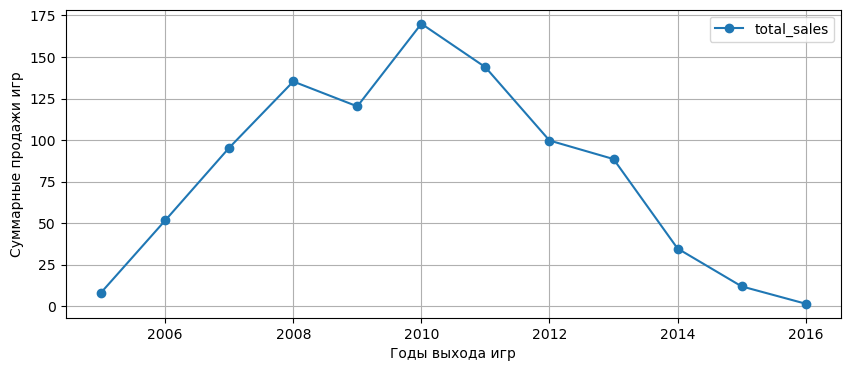

In [20]:
# Платформа X360

data[data['platform'] == 'X360'].pivot_table(index='year', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 4), style='o-');
plt.ticklabel_format(style='plain');
plt.xlabel("Годы выхода игр");
plt.ylabel("Суммарные продажи игр");

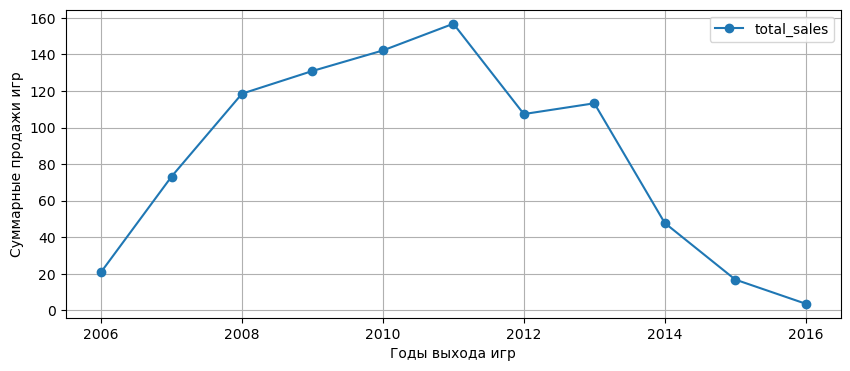

In [21]:
# Платформа PS3

data[data['platform'] == 'PS3'].pivot_table(index='year', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 4), style='o-');
plt.ticklabel_format(style='plain');
plt.xlabel("Годы выхода игр");
plt.ylabel("Суммарные продажи игр");

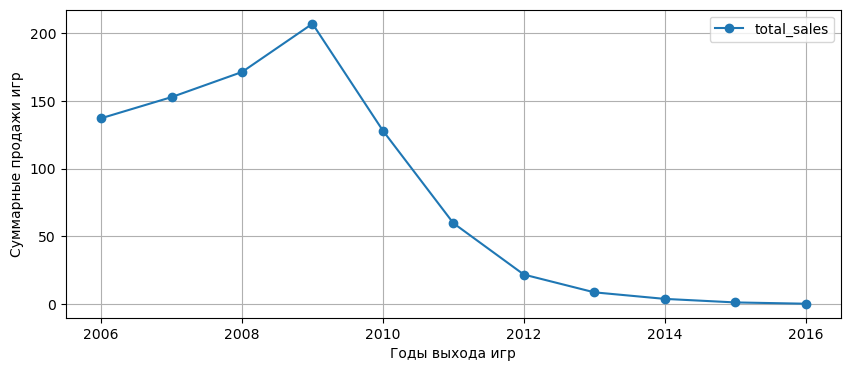

In [22]:
# Платформа Wii

data[data['platform'] == 'Wii'].pivot_table(index='year', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 4), style='o-');
plt.ticklabel_format(style='plain');
plt.xlabel("Годы выхода игр");
plt.ylabel("Суммарные продажи игр");

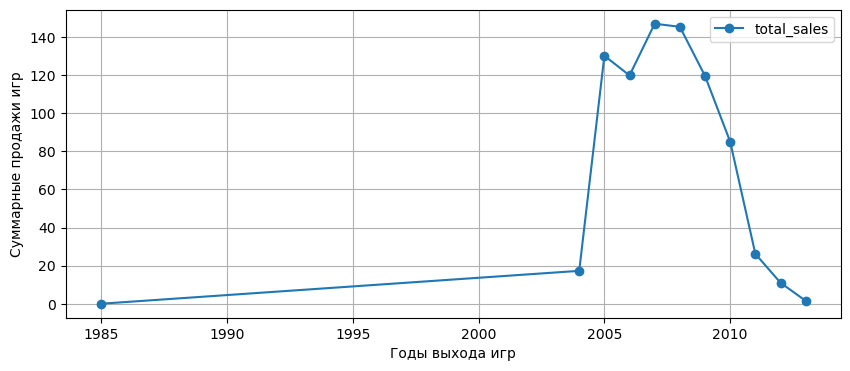

In [23]:
# Платформа DS

data[data['platform'] == 'DS'].pivot_table(index='year', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 4), style='o-');
plt.ticklabel_format(style='plain');
plt.xlabel("Годы выхода игр");
plt.ylabel("Суммарные продажи игр");

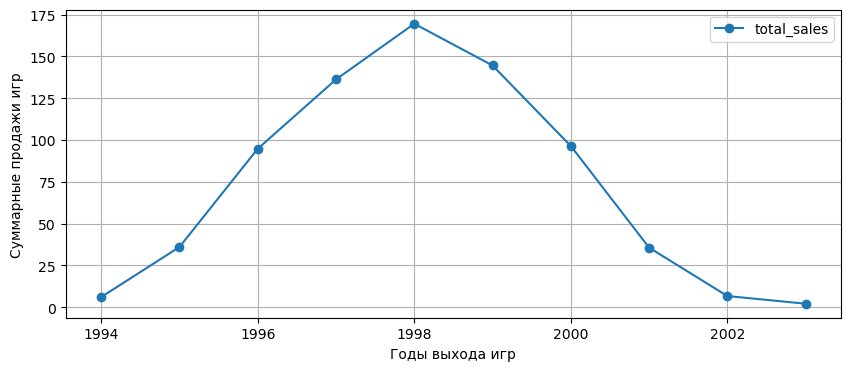

In [24]:
# Платформа PS

data[data['platform'] == 'PS'].pivot_table(index='year', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 4), style='o-');
plt.ticklabel_format(style='plain');
plt.xlabel("Годы выхода игр");
plt.ylabel("Суммарные продажи игр");

In [25]:
# Группируем датасет по платформам и отсортировываем самые кассовые, формируем список их названий 

platform_sorted = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(12)
platform_sorted_list = list(platform_sorted.index)

# Выбираем из датасета строки, где в столбце platform указаны только платформы из Top-12
data_platform = data.query('platform in @platform_sorted_list')

# Из отфильтрованного датасета создаем сводную таблицу по годам, платформам и средним значениям общих продаж
data_platform.pivot_table(index='year', columns='platform', values='total_sales', aggfunc='mean')

platform,3DS,DS,GB,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year,,,,,,,,,,,,
1985,NaN,0.020000,NaN,NaN,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,1.430000,NaN,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,6.497000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,1.630000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,0.618889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.641429,NaN,0.606000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,4.060000,NaN,2.145000,0.354706,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,0.900000,NaN,2.110000,0.363232,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,6.005000,NaN,2.645000,0.577439,NaN,NaN,NaN,NaN,NaN,NaN


***
Платформы с самыми массовыми продажами за все годы: PS2, X360, PS3, Wii, DS, PS. Характерно, что средний "срок жизни" платформы составляет около **10 лет** (по платформе DS замечен выброс, в датасете есть только одна игра 1985 года и, вероятнее всего, это ошибка: год запуска платформы - 2004), если не учитывать персональные компьютеры, которые не являются исключительно игровой платформой (у них меняются операционные системы, технические характеристики и т.п.).
***

### Выбор данных за актуальный период <a id='3.3'></a>

***
Исходя из выводов, полученных на предыдущих шагах (примерно одинаковое среднее количество игр, выпущенных ежегодно после 2011 года, - 570, средний "срок жизни" игровой платформы - 10 лет) выбираем актуальный период, подходящий для прогнозирования на 2017 год - **с 2012 года**. Таким образом, на наш прогноз не повлияет "бум" игровых платформ, случившийся в 2000х, и высока вероятность того, что игровые платформы, популярные в выбранном периоде, сохранят популярность и в 2017 году.
*** 

In [26]:
# Объявляем новую переменную, содержащую только строки с годами после 2011 года (выбранный для исследования актуальный период)

data_actual = data.query('year > 2011')

In [27]:
# Выводим на экран информацию о данных за актуальный период

data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2886 non-null   object 
 1   platform      2886 non-null   object 
 2   year          2886 non-null   int32  
 3   genre         2886 non-null   object 
 4   na_sales      2886 non-null   float64
 5   eu_sales      2886 non-null   float64
 6   jp_sales      2886 non-null   float64
 7   other_sales   2886 non-null   float64
 8   critic_score  1312 non-null   float64
 9   user_score    1531 non-null   float64
 10  rating        2886 non-null   object 
 11  total_sales   2886 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.8+ KB


***
Характерно, что соотношение пропусков в столбцах critic_score, user_score и rating к общему количеству строк до фильтрации и после фильтрации - осталось примерно тем же (в среднем, **50% пропусков**)
***

### Анализ лидирующих за актуальный период платформ <a id='3.4'></a>

In [28]:
# Выявляем платформы - лидеры продаж с 2012 года

data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

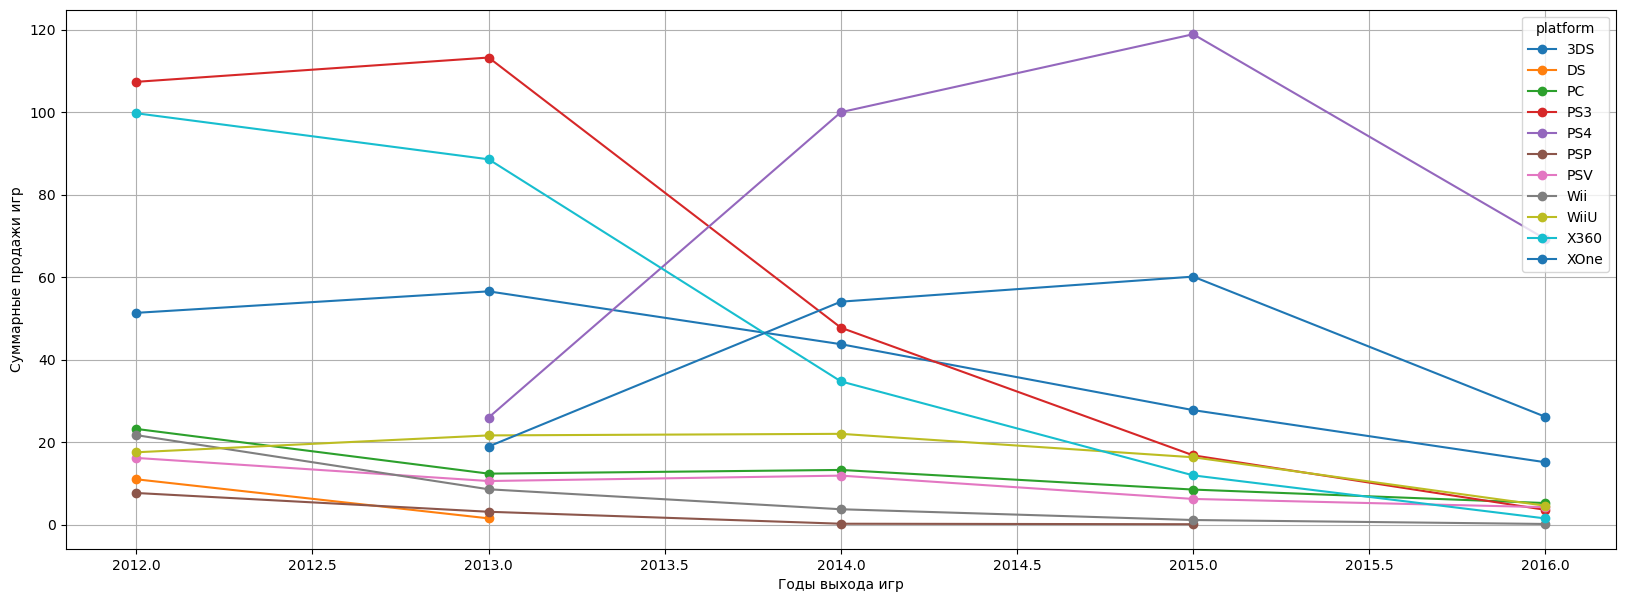

In [29]:
# Строим график по годам и общим продажам игр по платформам в актуальном периоде

data_actual.pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(20, 7), style='o-')
plt.ticklabel_format(style='plain')
plt.xlabel("Годы выхода игр");
plt.ylabel("Суммарные продажи игр");

In [30]:
# Выводим сводную таблицу с суммами продаж по годам и платформам

data_actual.pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


***
В актуальном периоде:

- лидеры продаж - платформы PS4 (суммарно 314.14 млн копий продано), PS3 (суммарно 288.79 млн копий продано), X360 (суммарно 236.54 млн копий продано), 3DS (суммарно 194.61 млн копий продано), XOne (суммарно 159.32 млн копий продано)

- с учетом того, что данные за 2016 год неполные, уверенный рост продаж наблюдается у платформ **PS4** (118.9 млн копий в 2015 году против 100 млн копий в 2014 году) и **XOne** (60 млн копий в 2015 году против 54 млн копий в 2014 году)
***

### Построение и анализ графика «ящик с усами» по глобальным продажам игр в разбивке по платформам <a id='3.5'></a>

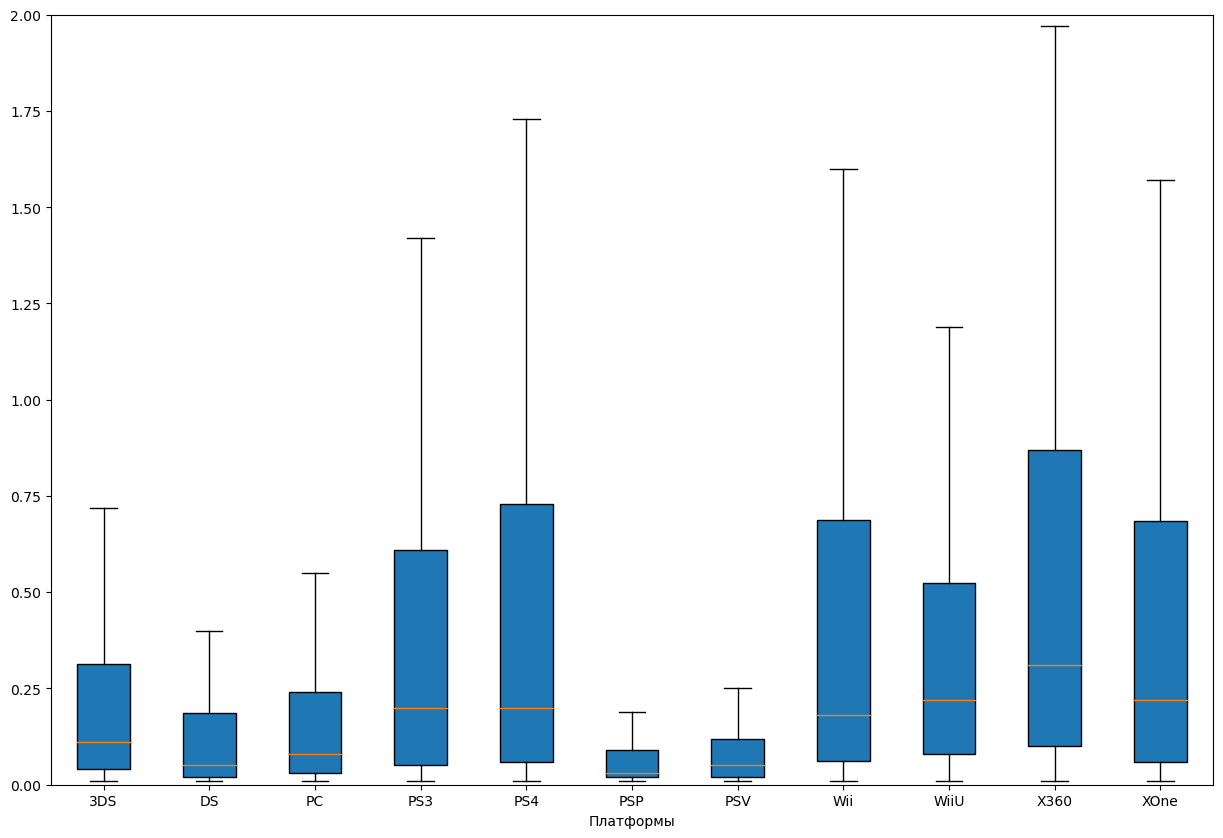

In [31]:
# Готовим переменные, содержащмие общие продажи по каждой платформе в актуальном периоде
_3DS = data_actual[data_actual['platform'] == "3DS"]['total_sales']
DS = data_actual[data_actual['platform'] == "DS"]['total_sales']
PC = data_actual[data_actual['platform'] == "PC"]['total_sales']
PS3 = data_actual[data_actual['platform'] == "PS3"]['total_sales']
PS4 = data_actual[data_actual['platform'] == "PS4"]['total_sales']
PSP = data_actual[data_actual['platform'] == "PSP"]['total_sales']
PSV = data_actual[data_actual['platform'] == "PSV"]['total_sales']
Wii = data_actual[data_actual['platform'] == "Wii"]['total_sales']
WiiU = data_actual[data_actual['platform'] == "WiiU"]['total_sales']
X360 = data_actual[data_actual['platform'] == "X360"]['total_sales']
XOne = data_actual[data_actual['platform'] == "XOne"]['total_sales']
pltf = [_3DS, DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne]


# Строим диаграммы размаха по общим продажам по каждой платформе
plt.figure(figsize=(15, 10))
plt.boxplot(pltf, labels=['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], patch_artist=True, showfliers=False)
plt.ylim(0, 2);
plt.xlabel("Платформы");

***
Исходя из диаграмм размаха можно сделать следующие выводы:

- Для всех платформ в актуальном периоде характерно то, что до 50% игр платформы продаются количеством до 300 000 копий.

- Количество игр, чьи продажи превышают 300 000 копий, значительно меньше, это касается каждой платформы.

- Средние значения продаж смещены "вверх", разброс значений высок.

- На общую картину и статистику продаж сильно влияют **игры, имеющие большой успех** (т.е. игры, количество продаж которых значительно выше среднего), за их счёт отличается общее количество продаж на разных платформах.

- Лидеры по сумме проданных копий, и по количеству игр - разные. Игры, выпущенные на платформе X360, уступают по сумме проданных копий играм, выпущенным на платформе PS4, но их количество выше.
***

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков <a id='3.6'></a>

#### Влияние оценки критиков на продажи, платформа PS4

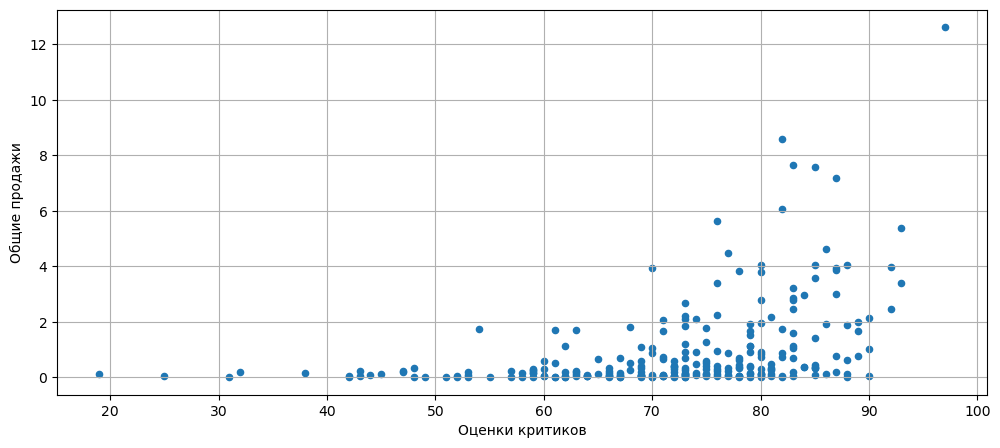

In [32]:
# Рассмотрим и визуализируем влияние оценки критиков на продажи по популярной платформе PS4, построив диаграмму рассеяния

data_actual[data_actual['platform'] == "PS4"].plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(12, 5));
plt.xlabel("Оценки критиков");
plt.ylabel("Общие продажи");

In [33]:
# Рассчитаем коэффициент корреляции Пирсона между оценками критиков и продажами

print()
print('Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе PS4:', \
      data_actual[data_actual['platform'] == "PS4"]['critic_score'].corr(data_actual[data_actual['platform'] == "PS4"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе PS4: 0.40656790206178123


#### Влияние оценки пользователей на продажи, платформа PS4

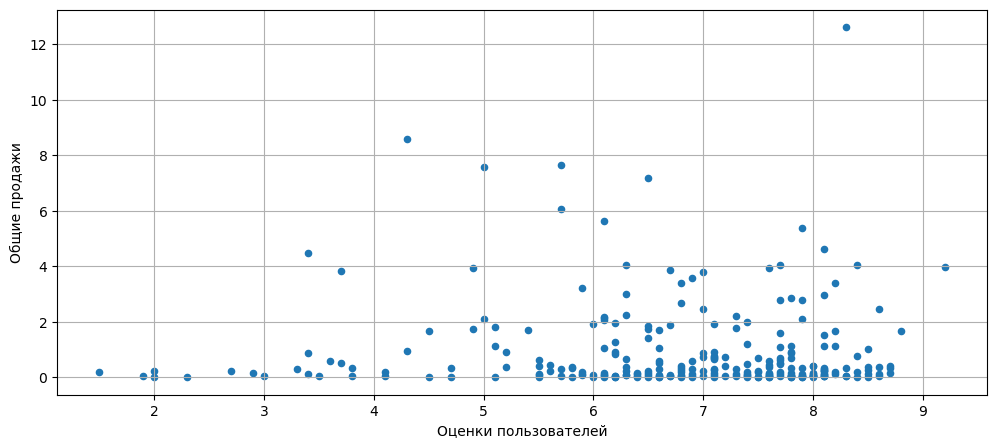

In [34]:
# Рассмотрим и визуализируем влияние оценки пользователей на продажи по популярной платформе PS4, построив диаграмму рассеяния

data_actual[data_actual['platform'] == "PS4"].plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(12, 5));
plt.xlabel("Оценки пользователей");
plt.ylabel("Общие продажи");

In [35]:
# Рассчитаем коэффициент корреляции Пирсона между оценками пользователей и продажами

print()
print('Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе PS4:', \
      data_actual[data_actual['platform'] == "PS4"]['user_score'].corr(data_actual[data_actual['platform'] == "PS4"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе PS4: -0.03195711020455644


***
Изучив влияние на продажи внутри одной популярной платформы (PS4) отзывов пользователей и критиков, можно сделать следующие выводы:

- Между оценкой критиков и общими продажами игры существует прямая зависимость (чем выше оценка - тем выше продажи), однако, эта **зависимость довольно слабая**, коэффициент корреляции Пирсона 0.4: основная масса игр с оценкой критиков выше 70 показывают относительно невысокие продажи.

- Между оценкой пользователей и общими продажами игры существует обратная зависимость (чем ниже оценка - тем выше продажи), однако, эта **зависимость минимальная**, коэффициент корреляции Пирсона -0.03, что приближается к нулю.

- Можно предположить, что такое положение дел объясняется следующим образом. Критики влияют на продажи не своей покупкой (как правило, игры им на обзор предоставляются бесплатно), а своим мнением. Мнение критиков, появляющееся в скором времени после выхода игры, может "разогнать" продажи в случае, если они благоприятное. Под влиянием отзывов критиков, пользователи и формируют продажи игры, и свое мнение они формируют уже после приобретения игры, и это мнение может быть менее благоприятным, чем мнение критиков - и, судя по диаграммам, так оно и оказывается. Схема процесса может выглядеть так: выход игры - высокая оценка критиков - рост продаж - разочарование пользователей - низкие оценки пользователей.

- Еще одним предположением, которое может объяснить слабую зависимость продаж от оценок пользователей, может служить следующее: пользователи, принимая решение о приобретении игры, не обращают внимание на отзывы других пользователей, которые уже приобрели игру и поставили ей оценку. Возможно, оценка критиков и субъективные ожидания играют решающую роль в покупке игры.
***

### Соотнесение выводов с продажами игр на других платформах <a id='3.7'></a>

#### Влияние оценки критиков и пользователей на продажи, платформа X360

In [36]:
print()
print('Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе X360:', \
      data_actual[data_actual['platform'] == "X360"]['critic_score'].corr(data_actual[data_actual['platform'] == "X360"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе X360: 0.36057348885073387


In [37]:
print()
print('Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе X360:', \
      data_actual[data_actual['platform'] == "X360"]['user_score'].corr(data_actual[data_actual['platform'] == "X360"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе X360: 0.006163978646213359


#### Влияние оценки критиков и пользователей на продажи, платформа PS3

In [38]:
print()
print('Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе PS3:', \
      data_actual[data_actual['platform'] == "PS3"]['critic_score'].corr(data_actual[data_actual['platform'] == "PS3"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе PS3: 0.33149725926295903


In [39]:
print()
print('Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе PS3:', \
      data_actual[data_actual['platform'] == "PS3"]['user_score'].corr(data_actual[data_actual['platform'] == "PS3"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе PS3: -0.005143522887113829


#### Влияние оценки критиков и пользователей на продажи, платформа 3DS

In [40]:
print()
print('Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе 3DS:', \
      data_actual[data_actual['platform'] == "3DS"]['critic_score'].corr(data_actual[data_actual['platform'] == "3DS"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе 3DS: 0.3208028695360785


In [41]:
print()
print('Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе 3DS:', \
      data_actual[data_actual['platform'] == "3DS"]['user_score'].corr(data_actual[data_actual['platform'] == "3DS"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе 3DS: 0.19758263411038593


#### Влияние оценки критиков и пользователей на продажи, платформа XOne

In [42]:
print()
print('Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе XOne:', \
      data_actual[data_actual['platform'] == "XOne"]['critic_score'].corr(data_actual[data_actual['platform'] == "XOne"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе XOne: 0.41699832800840153


In [43]:
print()
print('Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе XOne:', \
      data_actual[data_actual['platform'] == "XOne"]['user_score'].corr(data_actual[data_actual['platform'] == "XOne"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе XOne: -0.06892505328279418


#### Влияние оценки критиков и пользователей на продажи, платформа WiiU

In [44]:
print()
print('Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе WiiU:', \
      data_actual[data_actual['platform'] == "WiiU"]['critic_score'].corr(data_actual[data_actual['platform'] == "WiiU"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе WiiU: 0.34837976012017496


In [45]:
print()
print('Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе WiiU:', \
      data_actual[data_actual['platform'] == "WiiU"]['user_score'].corr(data_actual[data_actual['platform'] == "WiiU"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе WiiU: 0.40021902021486194


#### Влияние оценки критиков и пользователей на продажи, платформа PC

In [46]:
print()
print('Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе PC:', \
      data_actual[data_actual['platform'] == "PC"]['critic_score'].corr(data_actual[data_actual['platform'] == "PC"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой критиков и общими продажами игр на платформе PC: 0.23724324311567904


In [47]:
print()
print('Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе PC:', \
      data_actual[data_actual['platform'] == "PC"]['user_score'].corr(data_actual[data_actual['platform'] == "PC"]['total_sales']))


Коэффициент корреляции Пирсона между оценкой пользователей и общими продажами игр на платформе PC: -0.12186747630735571


***
Можно отметить следующее:

- корреляция между оценками критиков и общими продажами на всех рассмотренных платформах **прямая, но слабая**.

- корреляция между оценками пользователей и общими продажами на всех рассмотренных платформах **стремится к нулю**.

- по поводу влияния оценок на продажи по всем рассмотренным платформам применимы те же выводы, сделанные ранее для платформы PS4.
***

In [48]:
data_actual.groupby('platform')[['critic_score', 'user_score', 'total_sales']].corr()

critic_score  user_score  total_sales
platform                                                    
3DS      critic_score      1.000000    0.722762     0.320803
         user_score        0.722762    1.000000     0.197583
         total_sales       0.320803    0.197583     1.000000
DS       critic_score           NaN         NaN          NaN
         user_score             NaN    1.000000     0.882709
         total_sales            NaN    0.882709     1.000000
PC       critic_score      1.000000    0.432587     0.237243
         user_score        0.432587    1.000000    -0.121867
         total_sales       0.237243   -0.121867     1.000000
PS3      critic_score      1.000000    0.539456     0.331497
         user_score        0.539456    1.000000    -0.005144
         total_sales       0.331497   -0.005144     1.000000
PS4      critic_score      1.000000    0.557654     0.406568
         user_score        0.557654    1.000000    -0.031957
         total_sales       0.406568   -0.031957     1.000000
PSP      critic_score           NaN         NaN          NaN
         user_score             NaN    1.000000    -0.802302
         total_sales            NaN   -0.802302     1.000000
PSV      critic_score      1.000000    0.699199     0.094488
         user_score        0.699199    1.000000    -0.004339
         total_sales       0.094488   -0.004339     1.000000
Wii      critic_score      1.000000    0.816295    -0.424341
         user_score        0.816295    1.000000     0.296197
         total_sales      -0.424341    0.296197     1.000000
WiiU     critic_score      1.000000    0.770080     0.348380
         user_score        0.770080    1.000000     0.400219
         total_sales       0.348380    0.400219     1.000000
X360     critic_score      1.000000    0.557352     0.360573
         user_score        0.557352    1.000000     0.006164
         total_sales       0.360573    0.006164     1.000000
XOne     critic_score      1.000000    0.472462     0.416998
         user_score        0.472462    1.000000    -0.068925
         total_sales       0.416998   -0.068925     1.000000

### Распределение игр по жанрам <a id='3.8'></a>

In [49]:
# Строим сводную таблицу по жанрам и общим продажам, считаем количество и среднее

genre_pivot = data_actual.pivot_table(index='genre', values='total_sales', aggfunc=('count', 'mean'))
genre_pivot.sort_values(by='mean', ascending=False)

,count,mean
genre,,
Shooter,235,1.296723
Platform,85,0.717647
Sports,268,0.675634
Role-Playing,370,0.521081
Racing,115,0.465217
Misc,192,0.442917
Simulation,80,0.439000
Action,1031,0.427856
Fighting,109,0.408165


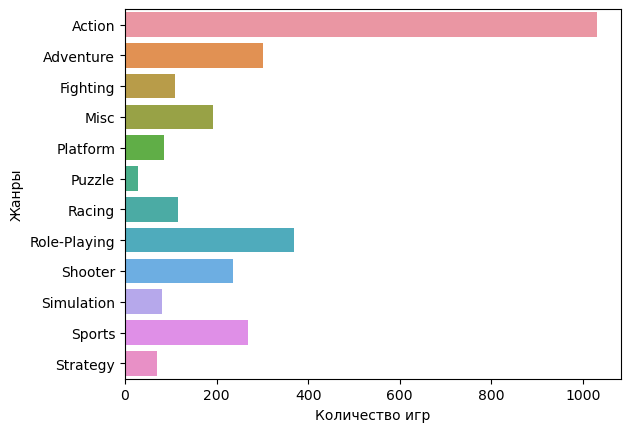

In [50]:
# Строим столбчатую диаграмму для отображения соотношения жанра и количества игр

seaborn.barplot(data=genre_pivot, x='count', y=genre_pivot.index);
plt.xlabel("Количество игр");
plt.ylabel("Жанры");

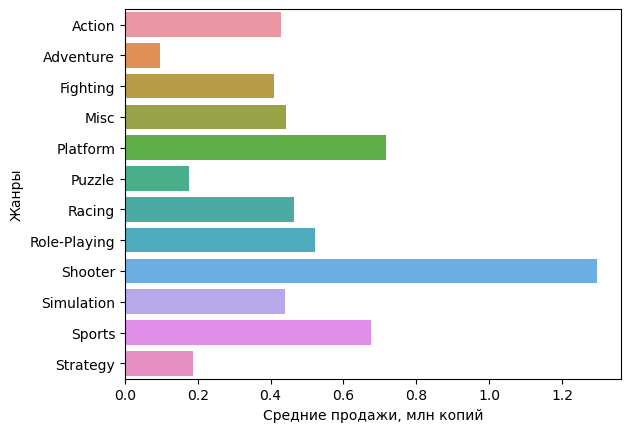

In [51]:
# Строим столбчатую диаграмму для отображения соотношения жанра и средних продаж

seaborn.barplot(data=genre_pivot, x='mean', y=genre_pivot.index);
plt.xlabel("Средние продажи, млн копий");
plt.ylabel("Жанры");

***
Выводы:

- **Наибольшее количество продаж** - в жанрах Action (1031), Role-Playing (370), Adventure (302), Sports (268).

- **Наименьшее количество продаж** - в жанрах Puzzle (28), Strategy (71), Simulation (80).

- **Наиболее прибыльные жанры** - Shooter (1.29 млн копий одной игры в среднем в актуальном периоде), Platform (0.7 млн копий одной игры в среднем в актуальном периоде), Sports (0.67 млн копий одной игры в среднем в актуальном периоде)

- В жанрах Action и Adventure большое количество игр, но малое среднее количество копий на каждую игру, в жанрах Platform, Shooter и Sports наоборот.

- В жанре Role-Playing оба показателя средние.

***

****
### Промежуточные выводы по третьему этапу <a id='3.9'></a>

После 2011 года количество выпущенных игр, представленных в датасете, сократилось практически вдвое. C 2012 года по 2016 год выпускалось в среднем 570 игр ежегодно.
Платформы с самыми массовыми продажами за все годы: PS2, X360, PS3, Wii, DS, PS. Характерно, что средний "срок жизни" платформы составляет около 10 лет.
Таким образом, актуальный период, подходящий для прогнозирования на 2017 год - с 2012 года. Дальнейшие выводы сделаны на основе анализа данных в актуальном периоде.

- Лидеры продаж - платформы PS4 (суммарно 314.14 млн копий продано), PS3 (суммарно 288.79 млн копий продано), X360 (суммарно 236.54 млн копий продано), 3DS (суммарно 194.61 млн копий продано), XOne (суммарно 159.32 млн копий продано)

- С учетом того, что данные за 2016 год неполные, уверенный рост продаж наблюдается у платформ PS4 (118.9 млн копий в 2015 году против 100 млн копий в 2014 году) и XOne (60 млн копий в 2015 году против 54 млн копий в 2014 году)

- Для всех платформ в актуальном периоде характерно то, что до 50% игр платформы продаются количеством до 300 000 копий.

- Количество игр, чьи продажи превышают 300 000 копий, значительно меньше, это касается каждой платформы.

- На общую картину и статистику продаж сильно влияют игры, имеющие большой успех (т.е. игры, количество продаж которых значительно выше среднего), за их счёт отличается общее количество продаж на разных платформах.

- Лидеры по сумме проданных копий, и по количеству игр - разные. Например, игры, выпущенные на платформе X360, уступают по сумме проданных копий играм, выпущенным на платформе PS4, но их количество выше.

- Корреляция между оценками критиков и общими продажами на основных рассмотренных платформах прямая, но слабая.

- Корреляция между оценками пользователей и общими продажами на основных рассмотренных платформах стремится к нулю.

- Можно предположить, что такое положение дел объясняется следующим образом. Критики влияют на продажи не своей покупкой (как правило, игры им на обзор предоставляются бесплатно), а своим мнением. Мнение критиков, появляющееся в скором времени после выхода игры, может "разогнать" продажи в случае, если они благоприятное. Под влиянием отзывов критиков, пользователи и формируют продажи игры, и свое мнение они формируют уже после приобретения игры, и это мнение может быть менее благоприятным, чем мнение критиков - и, судя по диаграммам, так оно и оказывается. Схема процесса может выглядеть так: выход игры - высокая оценка критиков - рост продаж - разочарование пользователей - низкие оценки пользователей.

- Еще одним предположением, которое может объяснить слабую зависимость продаж от оценок пользователей, может служить следующее: пользователи, принимая решение о приобретении игры, не обращают внимание на отзывы других пользователей, которые уже приобрели игру и поставили ей оценку. Возможно, оценка критиков и субъективные ожидания играют решающую роль в покупке игры.

- Наибольшее количество продаж - в жанрах Action (1031), Role-Playing (370), Adventure (302), Sports (268).

- Наименьшее количество продаж - в жанрах Puzzle (28), Strategy (71), Simulation (80).

- Наиболее прибыльные жанры - Shooter (1.29 млн копий одной игры в среднем в актуальном периоде), Platform (0.7 млн копий одной игры в среднем в актуальном периоде), Sports (0.67 млн копий одной игры в среднем в актуальном периоде)

- В жанрах Action и Adventure большое количество игр, но малое среднее количество копий на каждую игру, в жанрах Platform, Shooter и Sports наоборот. В жанре Role-Playing оба показателя средние.

****

## Составление портрета пользователя каждого региона <a id='4'></a>

### Пользователи из Северной Америки <a id='4.1'></a>

#### Самые популярные платформы (топ-5) для Северной Америки

,count,sum
platform,,
X360,292,140.05
PS4,392,108.74
PS3,493,103.38
XOne,247,93.12
3DS,396,55.31


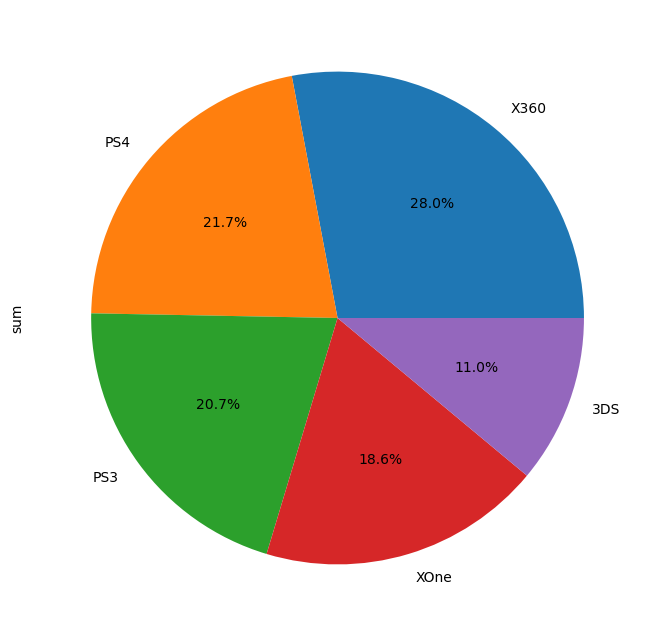

In [52]:
# Составляем сводную таблицу по суммам продаж и платформам по региону, и строим круговую диаграмму с долями продаж

na_platform_pivot = data_actual.pivot_table(index='platform', values='na_sales', aggfunc=('count', 'sum'))
na_platform_pivot_sorted = na_platform_pivot.sort_values(by='sum', ascending=False).head(5)
na_platform_pivot_sorted['sum'].plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%');
na_platform_pivot_sorted


Самые популярные платформы в актуальном периоде в Северной Америке - X360, PS4, PS3, XOne, 3DS.


#### Самые популярные жанры (топ-5) для Северной Америки

,count,sum
genre,,
Action,1031,177.84
Shooter,235,144.77
Sports,268,81.53
Role-Playing,370,64.00
Misc,192,38.19


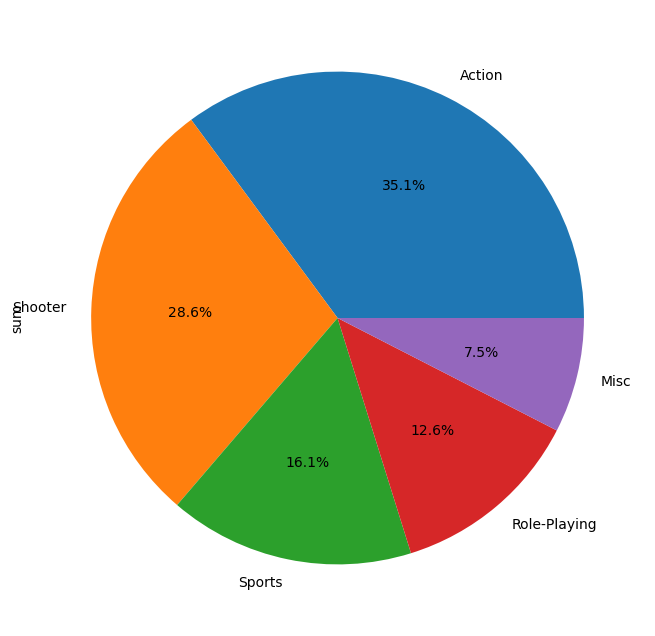

In [53]:
# Составляем сводную таблицу по суммам продаж и жанрам по региону, и строим круговую диаграмму с долями продаж

na_genre_pivot = data_actual.pivot_table(index='genre', values='na_sales', aggfunc=('count', 'sum'))
na_genre_pivot_sorted = na_genre_pivot.sort_values(by='sum', ascending=False).head(5)
na_genre_pivot_sorted['sum'].plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%');
na_genre_pivot_sorted


Самые популярные жанры в актуальном периоде в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc.


#### Влияние рейтинга ESRB на продажи в Северной Америке

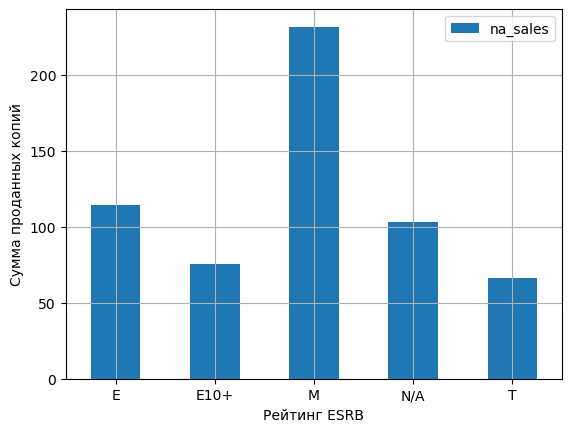

In [54]:
# Составляем сводную таблицу по суммам продаж и рейтингу по региону, и строим график

data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar', grid=True);
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Сумма проданных копий");
plt.xticks(rotation=0);


Больше всего в актуальном периоде продано копий игр с рейтингом M - то есть, для взрослых от 17 лет. 

Игр с рейтингом E, то есть "для всех", продано вдвое меньше.

На третьем месте по продажам игры, рейтинг которых не указан (N/A), их почти столько же, сколько игр с рейтингом E.

Игр для детей от 10 лет и для тинейджеров продано примерно поровну и в целом меньше всего.


### Пользователи из Европы <a id='4.2'></a>

#### Самые популярные платформы (топ-5) для Европы

,count,sum
platform,,
PS4,392,141.09
PS3,493,106.86
X360,292,74.52
XOne,247,51.59
3DS,396,42.64


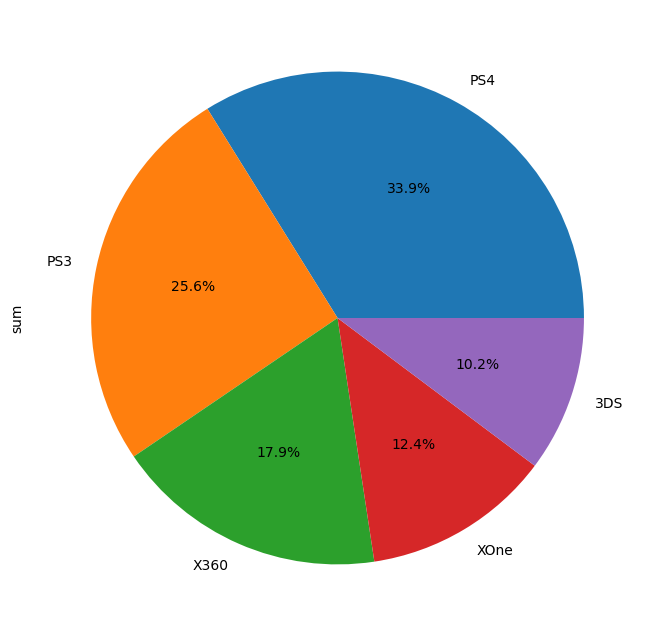

In [55]:
# Составляем сводную таблицу по суммам продаж и платформам по региону, и строим круговую диаграмму с долями продаж

eu_platform_pivot = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc=('count', 'sum'))
eu_platform_pivot_sorted = eu_platform_pivot.sort_values(by='sum', ascending=False).head(5)
eu_platform_pivot_sorted['sum'].plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%');
eu_platform_pivot_sorted


Самые популярные платформы в актуальном периоде в Европе - PS4, PS3, X360, XOne, 3DS.


#### Самые популярные жанры (топ-5) для Европы

,count,sum
genre,,
Action,1031,159.34
Shooter,235,113.47
Sports,268,69.09
Role-Playing,370,48.53
Racing,115,27.29


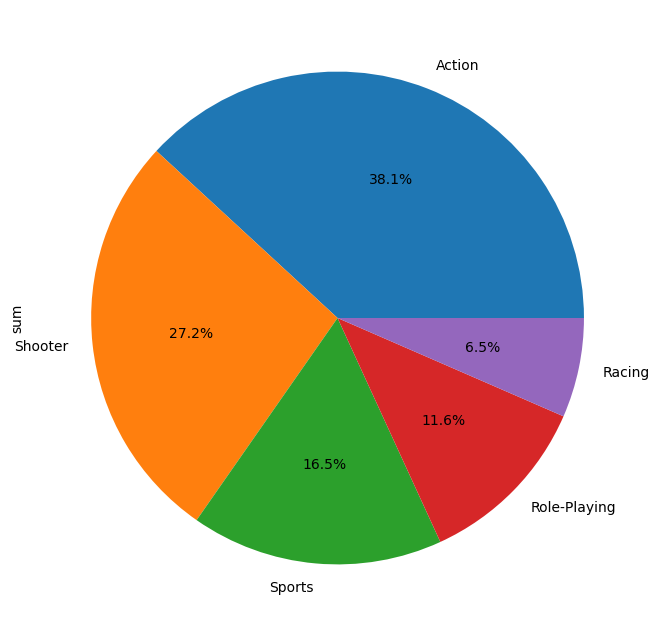

In [56]:
# Составляем сводную таблицу по суммам продаж и жанрам по региону, и строим круговую диаграмму с долями продаж

eu_genre_pivot = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc=('count', 'sum'))
eu_genre_pivot_sorted = eu_genre_pivot.sort_values(by='sum', ascending=False).head(5)
eu_genre_pivot_sorted['sum'].plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%');
eu_genre_pivot_sorted


Самые популярные жанры в актуальном периоде в Европе - Action, Shooter, Sports, Role-Playing, Racing.


#### Влияние рейтинга ESRB на продажи в Европе

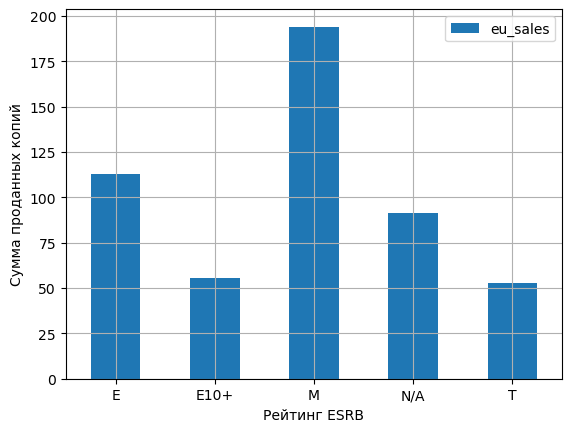

In [57]:
# Составляем сводную таблицу по суммам продаж и рейтингу по региону, и строим график

data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind='bar', grid=True);
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Сумма проданных копий");
plt.xticks(rotation=0);


Больше всего в актуальном периоде продано копий игр с рейтингом M - то есть, для взрослых от 17 лет.

Игр с рейтингом E, то есть "для всех", продано почти вдвое меньше.

На третьем месте по продажам игры, рейтинг которых не указан (N/A).

Игр для детей от 10 лет и для тинейджеров продано примерно поровну и в целом меньше всего.


### Пользователи из Японии <a id='4.3'></a>

#### Самые популярные платформы (топ-5) для  Японии

,count,sum
platform,,
3DS,396,87.79
PS3,493,35.29
PSV,411,21.04
PS4,392,15.96
WiiU,147,13.01


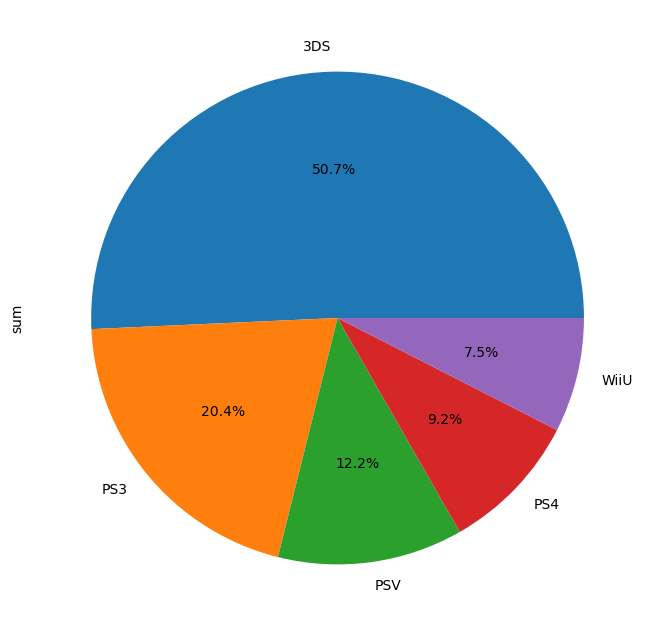

In [58]:
# Составляем сводную таблицу по суммам продаж и платформам по региону, и строим круговую диаграмму с долями продаж

jp_platform_pivot = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc=('count', 'sum'))
jp_platform_pivot_sorted = jp_platform_pivot.sort_values(by='sum', ascending=False).head(5) 
jp_platform_pivot_sorted['sum'].plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%');
jp_platform_pivot_sorted


Самые популярные платформы в актуальном периоде в Японии - 3DS, PS3, PSV, PS4, WiiU.


#### Самые популярные жанры (топ-5) для Японии

,count,sum
genre,,
Role-Playing,370,65.44
Action,1031,52.80
Misc,192,12.86
Simulation,80,10.41
Fighting,109,9.44


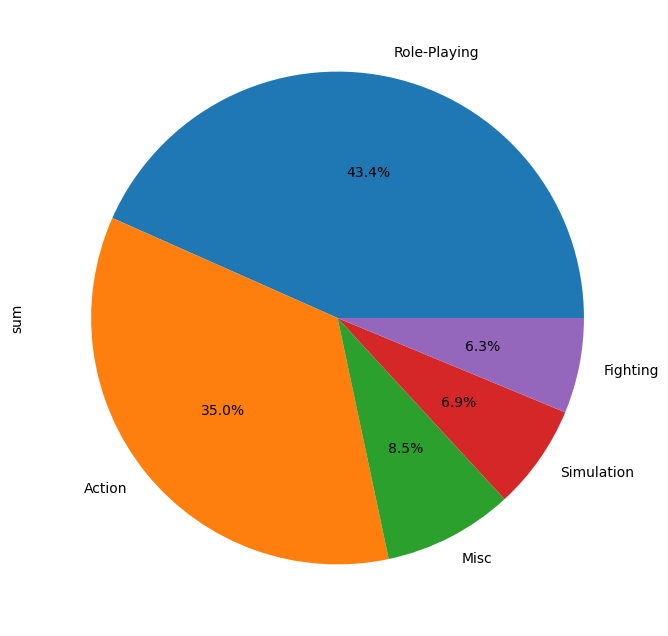

In [59]:
# Составляем сводную таблицу по суммам продаж и жанрам по региону, и строим круговую диаграмму с долями продаж

jp_genre_pivot = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc=('count', 'sum'))
jp_genre_pivot_sorted = jp_genre_pivot.sort_values(by='sum', ascending=False).head(5)
jp_genre_pivot_sorted['sum'].plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%');
jp_genre_pivot_sorted


Самые популярные жанры в актуальном периоде в Японии - Role-Playing, Action, Misc, Simulation, Fighting.


#### Влияние рейтинга ESRB на продажи в Японии

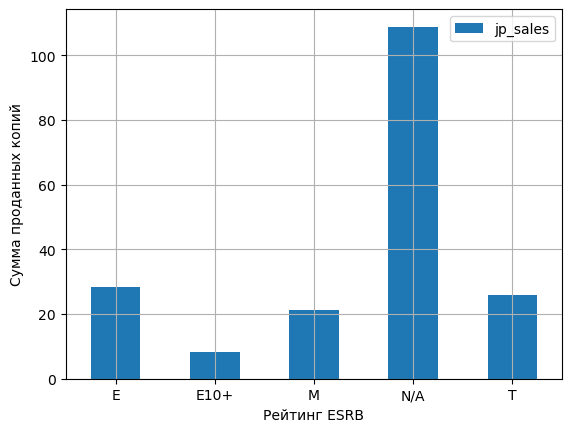

In [60]:
# Составляем сводную таблицу по суммам продаж и рейтингу по региону, и строим график

data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='bar', grid=True);
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Сумма проданных копий");
plt.xticks(rotation=0);


Больше всего в актуальном периоде продано копий игр, рейтинг ESRB которых не указан (N/A). 

На втором месте игры с рейтингами E, то есть "для всех", и T, для тинейджеров, их примерно поровну, и более чем в три раза меньше, чем игр с не указанным рейтингом ESRB.

Игр для детей от 10 лет продано меньше всего.


***
### Промежуточные выводы по четвертому этапу <a id='4.4'></a>

- *Самые популярные платформы (топ-5)*.

В Северной Америке и в Европе топ-5 популярных платформ одинаков (X360, PS4, PS3, XOne, 3DS), однако суммы продаж и их соотношение отличаются.
В США на платформу X360 приходится 27,9% продаж, на платформу PS4 - 21,7%, на платформу PS3 - 20,6%.
В Европе лидирует PS4 - 33,8% продаж, затем PS3 - 25,5%, и Х360 - 17,8%.
В Японии топ-5 популярных платформ совершенно иной (3DS, PS3, PSV, PS4, WiiU). При этом, чуть более 50% продаж приходится на платформу 3DS, это портативная игровая консоль. За ней идёт PS3 - 20,3% продаж, и замыкает тройку платформа PSV (тоже портативная) - 12%.
Таким образом, общие предпочтения в США и в Европе схожи, но отличаются долями в прдажах, а вот в Японии огромную популярность имеют портативные консоли.

- *Самые популярные жанры (топ-5)*

Предпочтения по жанрам в Северной Америке и Европе, опять же, очень схожи: лидируют Action, Shooter, Sports, Role-Playing, отличаются только пятые позиции, в США это Misc, в Европе - Racing.
В Японии предпочтения другие - Role-Playing, Action, Misc, Simulation, Fighting.

- *Влияние рейтинга ESRB на продажи*

В Северной Америке и в Европе больше всего продано игр с рейтингом M - для взрослых от 17 лет. Полагаем, это связано с жанровыми предпочтениями, такой рейтинг часто встречается у игр в жанре Action и Shooter. Игр с рейтингом E, то есть "для всех", продано вдвое меньше.

В Японии подавляющая часть проданных игр не имеет рейтинга ESRB. Это может быть связано как с тем, что для Японии этот рейтинг, изначально разработанный в США и для США, не актуален, в Японии есть собственная организация, занимающаяся присвоением рейтинга - CERO. 

На втором месте игры с рейтингами E, то есть "для всех", и T, для тинейджеров, их примерно поровну, и более чем в три раза меньше, чем игр с не указанным рейтингом ESRB.

***

## Проверка гипотез <a id='5'></a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые? <a id='5.1'></a>

***
```
H_0: Средний пользовательский рейтинг платформы Xbox One = Средний пользовательский рейтинг платформы PC
H_a: Средний пользовательский рейтинг платформы Xbox One ≠ Средний пользовательский рейтинг платформы PC
alpha = 0.05
```
***

In [61]:
xone_user_score = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'] >= 0)]['user_score']
pc_user_score = data_actual[(data_actual['platform'] == 'PC') & (data_actual['user_score'] >= 0)]['user_score']

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


***
В качестве нулевой гипотезы было принято утверждение о равенстве среднего пользовательского рейтинга платформы Xbox One и среднего пользовательского рейтинга платформы PC. Полученные в результате статистичекого теста данные **не показали противоречие** этой гипотезе. Нулевая гипотеза сформулирована так, что значения обеих генеральных совокупностей находятся в пределах изначально предполагаемого значения, в качестве уровня значимости принято стандартное значение 0.05.
Альтернативная гипотеза, соответственно, сформулирована так, что что значения обеих генеральных совокупностей выходят за пределы изначально предполагаемого значения, в нашем случае - не равны.

Обе генеральные совокупности (значения рейтинга игр платформы) большие, поэтому принято решение сравнивать средние значения по выборкам из каждой совокупности с использованием статистического теста.
***

### Средние пользовательские рейтинги жанров Action и Sports разные? <a id='5.2'></a>

***
```
H_0: Средний пользовательский рейтинг жанра Action = Средний пользовательский рейтинг жанра Sports
H_a: Средний пользовательский рейтинг жанра Action ≠ Средний пользовательский рейтинг жанра Sports
alpha = 0.05
```
***

In [62]:
action_user_score = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'] >= 0)]['user_score']
sports_user_score = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'] >= 0)]['user_score']

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.24307776572644e-20
Отвергаем нулевую гипотезу


***
В качестве нулевой гипотезы было принято утверждение о равенстве среднего пользовательского рейтинга жанра Action и среднего пользовательского рейтинга жанра Sports. Полученные в результате статистичекого теста данные **показали противоречие** этой гипотезе. Нулевая гипотеза сформулирована так, что значения обеих генеральных совокупностей находятся в пределах изначально предполагаемого значения, в качестве уровня значимости принято стандартное значение 0.05.
Альтернативная гипотеза, соответственно, сформулирована так, что что значения обеих генеральных совокупностей выходят за пределы изначально предполагаемого значения, в нашем случае - не равны.

Обе генеральные совокупности (значения рейтинга игр платформы) большие, поэтому принято решение сравнивать средние значения по выборкам из каждой совокупности с использованием статистического теста.
***

***
###  Промежуточные выводы по пятому этапу <a id='5.3'></a>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые? Можно сформулировать результаты теста так: **вероятность того, что средние пользовательские рейтинги на этих платформах одинаковые - выше, чем вероятность обратного**.

- Средние пользовательские рейтинги жанров Action и Sports разные? Можно сформулировать результаты теста так: **вероятность того, что средние пользовательские рейтинги в этих жанрах разные - выше, чем вероятность обратного**.
***

## Общий вывод <a id='6'></a>

***
### Анализ данных за актуальный период
После 2011 года количество выпущенных игр, представленных в датасете, сократилось практически вдвое. C 2012 года по 2016 год выпускалось в среднем 570 игр ежегодно. Средний "срок жизни" платформы составляет около 10 лет. Таким образом, актуальный период, подходящий для прогнозирования на 2017 год - **с 2012 года**. Выводы исследования сделаны на основе анализа данных в актуальном периоде.

- Лидеры по количеству продаж - платформы PS4 (суммарно 314.14 млн копий продано), PS3 (суммарно 288.79 млн копий продано), X360 (суммарно 236.54 млн копий продано), 3DS (суммарно 194.61 млн копий продано), XOne (суммарно 159.32 млн копий продано).

- Уверенный рост продаж наблюдается у платформ PS4 (118.9 млн копий в 2015 году против 100 млн копий в 2014 году) и XOne (60 млн копий в 2015 году против 54 млн копий в 2014 году).

- Для всех платформ в актуальном периоде характерно то, что основная масса вышедших на платформе игр (до 50%) продается количеством не более 300 000 копий.

- Количество игр, чьи продажи превышают 300 000 копий, значительно меньше, это касается каждой платформы.

- На общую картину и статистику продаж сильно влияют игры, имеющие большой успех (т.е. игры, количество продаж которых значительно выше среднего), за их счёт отличается общее количество продаж на разных платформах,смещается среднее количество продаж одной игры.

- Лидеры по сумме проданных копий, и по количеству игр - разные. Например, игры, выпущенные на платформе X360, уступают по сумме проданных копий играм, выпущенным на платформе PS4, но их количество выше.

- Корреляция между оценками критиков и общими продажами на основных рассмотренных платформах прямая, но слабая.

- Корреляция между оценками пользователей и общими продажами на основных рассмотренных платформах стремится к нулю.

*Можно предположить, что такое положение дел объясняется следующим образом. Критики влияют на продажи не своей покупкой (как правило, игры им на обзор предоставляются бесплатно), а своим мнением. Мнение критиков, появляющееся в скором времени после выхода игры, может "разогнать" продажи в случае, если они благоприятное. Под влиянием отзывов критиков, пользователи и формируют продажи игры, и свое мнение они формируют уже после приобретения игры, и это мнение может быть менее благоприятным, чем мнение критиков - и, судя по диаграммам, так оно и оказывается. Схема процесса может выглядеть так: выход игры - высокая оценка критиков - рост продаж - разочарование пользователей - низкие оценки пользователей*.

*Еще одним предположением, которое может объяснить слабую зависимость продаж от оценок пользователей, может служить следующее: пользователи, принимая решение о приобретении игры, не обращают внимание на отзывы других пользователей, которые уже приобрели игру и поставили ей оценку. Возможно, оценка критиков и субъективные ожидания играют решающую роль в покупке игры*.

- Наибольшее количество продаж - в жанрах Action (1031 млн копий), Role-Playing (370 млн копий), Adventure (302 млн копий), Sports (268 млн копий).

- Наименьшее количество продаж - в жанрах Puzzle (28 млн копий), Strategy (71 млн копий), Simulation (80 млн копий).

- Наиболее прибыльные жанры - Shooter (1.29 млн копий одной игры в среднем в актуальном периоде), Platform (0.7 млн копий одной игры в среднем в актуальном периоде), Sports (0.67 млн копий одной игры в среднем в актуальном периоде)

- В жанрах Action и Adventure большое количество игр, но малое среднее количество копий на каждую игру, в жанрах Platform, Shooter и Sports наоборот. В жанре Role-Playing оба показателя средние.

### Портреты пользователей по регионам (Северная Америка, Европа, Япония)

+ *Самые популярные платформы (топ-5)*.

В Северной Америке и в Европе топ-5 популярных платформ одинаков (X360, PS4, PS3, XOne, 3DS), однако суммы продаж и их соотношение отличаются. В США на платформу X360 приходится 27,9% продаж, на платформу PS4 - 21,7%, на платформу PS3 - 20,6%. В Европе лидирует PS4 - 33,8% продаж, затем PS3 - 25,5%, и Х360 - 17,8%.

В Японии топ-5 популярных платформ совершенно иной (3DS, PS3, PSV, PS4, WiiU). При этом, чуть более 50% продаж приходится на платформу 3DS, это портативная игровая консоль. За ней идёт PS3 - 20,3% продаж, и замыкает тройку платформа PSV (тоже портативная) - 12%.

Таким образом, общие предпочтения в США и в Европе схожи, но отличаются долями в продажах, а вот в Японии огромную популярность имеют портативные консоли.

+ *Самые популярные жанры (топ-5)*

Предпочтения по жанрам в Северной Америке и Европе, опять же, очень схожи: лидируют Action (35.1% в СА, 38.1% в Европе), Shooter (28.6% в СА, 27.2% в Европе), Sports (16.1% в СА, 16.5% в Европе), Role-Playing (12.6% в СА, 11.6% в Европе), отличаются только пятые позиции, в США это Misc (7.5%), в Европе - Racing (6.5%).
В Японии предпочтения другие - Role-Playing (43.4%), Action (35%), Misc (8.5%), Simulation (6.9%), Fighting (6.3%).
Жанр Action уверенно держит более 30% в каждом из трёх регионов. Это соотносится с количеством игр в этом жанре, однако, как было отмечено выше, среднее количество продаж на игру в этом жанре невысокое.

+ *Влияние рейтинга ESRB на продажи*

В Северной Америке и в Европе больше всего продано игр с рейтингом M - для взрослых от 17 лет. Полагаем, это связано с жанровыми предпочтениями, такой рейтинг часто встречается у игр в жанре Action и Shooter. Игр с рейтингом E, то есть "для всех", продано вдвое меньше.
В Японии, напротив, большая часть проданных игр - с рейтингом E и T, то есть, подходящие максимально широкому кругу игроков, что, по всей видимости, говорит о более "юной" игровой аудитории.


### Проверка гипотез

- *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?*

Можно сформулировать результаты теста так: **вероятность того, что средние пользовательские рейтинги на этих платформах одинаковые - выше, чем вероятность обратного**.

- *Средние пользовательские рейтинги жанров Action и Sports разные?*

Можно сформулировать результаты теста так: **вероятность того, что средние пользовательские рейтинги в этих жанрах разные - выше, чем вероятность обратного**.
***